# <div style=" text-align: center; font-weight: bold">Phase 04: Modelling</div>



The problem 01: In the `Price` column of the dataframe, we can see that there is many value is `Thỏa thuận`, so the purpose of us is predict the price the house base on its attributes.

## **Import necessary Python modules**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns



### **Read the data from file**
First, read the clean data that we cleaned before to a dataframe.

In [49]:
real_estate_for_sale_df = pd.read_csv('../Data/cleaned_real_estate_for_sale.csv', encoding='utf-8')

### **Preprocessing data**



#### Remove features that is not necessary for the model:
- We can see that, the column `Project` have many seperated values, also the `Posting date` column doesn't much meaning, so we will drop them.

In [50]:
real_estate_for_sale_df.drop(columns= ['Project', 'Posting date'], axis= 1, inplace= True)

Beside that, as we discuss before, for all the types of real estate, the column `District`, `Furniture` and `Legal` does not affect a lot to the price, so we also drop them

In [51]:
real_estate_for_sale_df.drop(columns= ['District', 'Furniture', 'Legal'], axis= 1, inplace= True)

### Convert all the non-numeric columns into numeric columns:
Now, we will convert all the columns in dataframe in to numerical data types


#### Normalize the value 
For this normalize, we use `One hot encoding`

In [52]:
real_estate_for_sale_df = pd.get_dummies(real_estate_for_sale_df, columns=['Type'])

real_estate_for_sale_df

,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Type_Căn hộ chung cư,"Type_Nhà biệt thự, liền kề",Type_Nhà mặt phố,Type_Nhà riêng,Type_Đất bán,Type_Đất nền dự án
0,161.08,1.798000e+10,3.0,3.0,3.0,True,False,False,False,False,False
1,116.00,9.800000e+09,3.0,2.0,3.0,True,False,False,False,False,False
2,77.00,6.000000e+09,2.0,2.0,3.0,True,False,False,False,False,False
3,76.00,6.200000e+09,2.0,2.0,3.0,True,False,False,False,False,False
4,95.00,7.600000e+09,2.0,2.0,3.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
43831,36.00,NaN,3.0,3.0,3.0,False,False,False,True,False,False
43832,140.00,3.400000e+10,5.0,6.0,6.0,False,False,True,False,False,False
43833,66.00,6.700000e+09,4.0,6.0,3.0,False,False,True,False,False,False
43834,63.00,5.700000e+09,1.0,1.0,1.0,False,False,False,True,False,False


Now, with the purpose of predict the price of real estate that have the price is `Thỏa thuận` (currently is `NaN`), we will seperate the dataframe into two part, one that price this  `Thỏa thuận` and all the others.

In [53]:
processed_real_estate_df = real_estate_for_sale_df[real_estate_for_sale_df['Price(VNĐ)'].notna()]
data_to_predict_df = real_estate_for_sale_df[real_estate_for_sale_df['Price(VNĐ)'].isna()]

processed_real_estate_df

,Area(m2),Price(VNĐ),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Type_Căn hộ chung cư,"Type_Nhà biệt thự, liền kề",Type_Nhà mặt phố,Type_Nhà riêng,Type_Đất bán,Type_Đất nền dự án
0,161.08,1.798000e+10,3.0,3.0,3.0,True,False,False,False,False,False
1,116.00,9.800000e+09,3.0,2.0,3.0,True,False,False,False,False,False
2,77.00,6.000000e+09,2.0,2.0,3.0,True,False,False,False,False,False
3,76.00,6.200000e+09,2.0,2.0,3.0,True,False,False,False,False,False
4,95.00,7.600000e+09,2.0,2.0,3.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
43829,78.20,4.000000e+09,-1.0,-1.0,-1.0,False,False,False,False,False,True
43830,140.00,1.150000e+10,4.0,4.0,3.0,False,True,False,False,False,False
43832,140.00,3.400000e+10,5.0,6.0,6.0,False,False,True,False,False,False
43833,66.00,6.700000e+09,4.0,6.0,3.0,False,False,True,False,False,False


#### Detect the outlier for each columns:

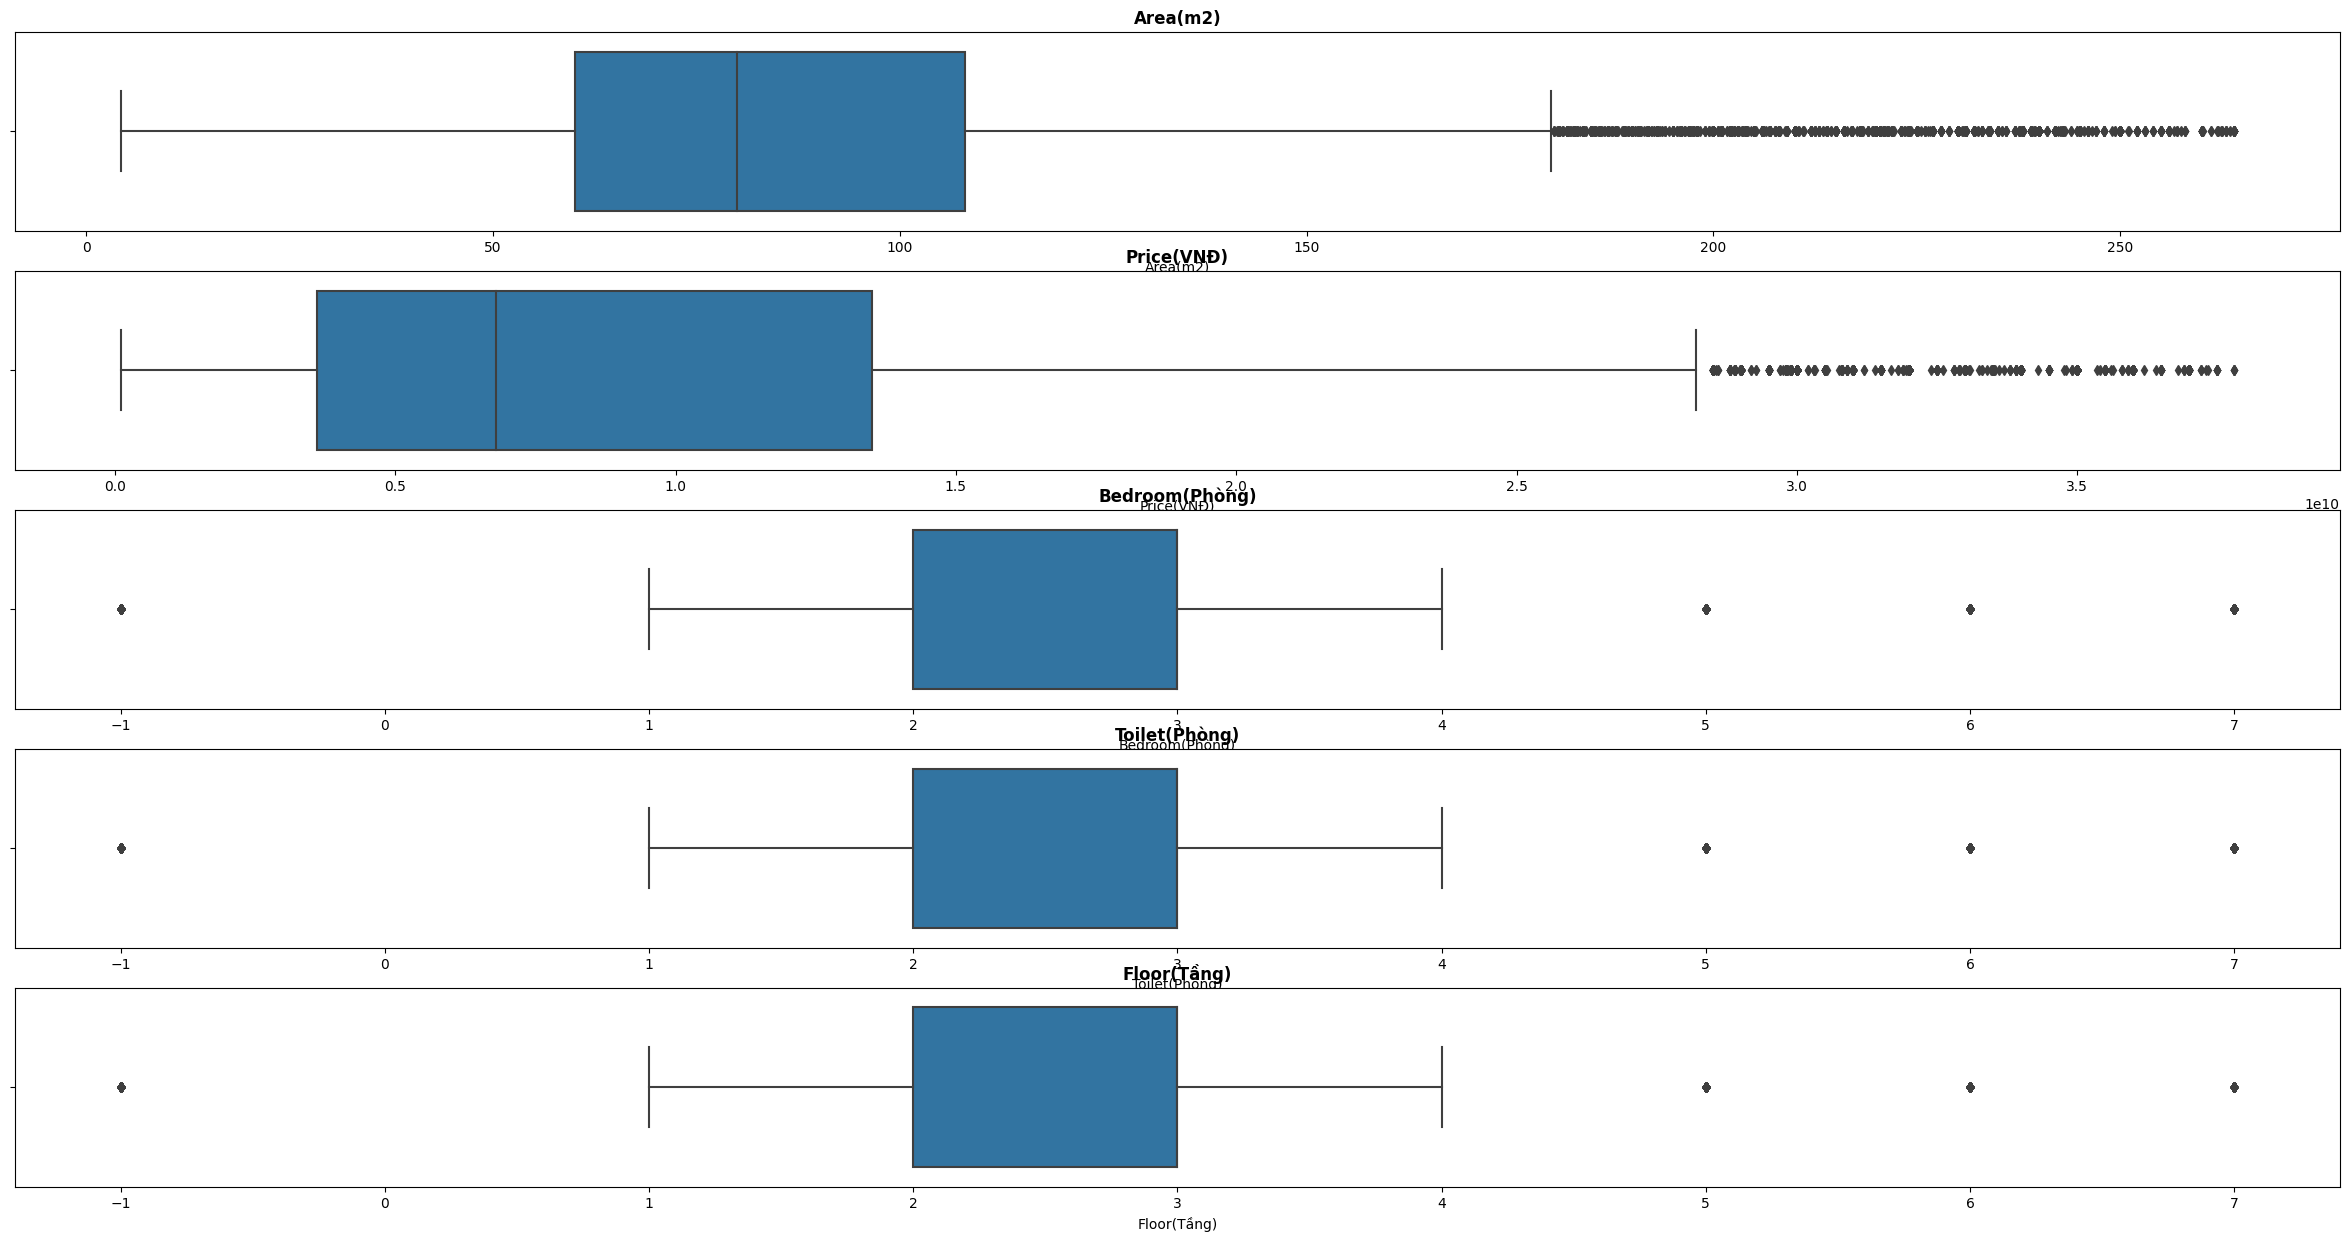

In [54]:

columns_to_plot = ['Area(m2)', 'Price(VNĐ)', 'Bedroom(Phòng)', 'Toilet(Phòng)', 'Floor(Tầng)']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(30, 15))


for i, column in enumerate(columns_to_plot):
    sns.boxplot(x = real_estate_for_sale_df[column], ax=axes[i])
    axes[i].set_title(column, fontweight = 'bold')

plt.show()

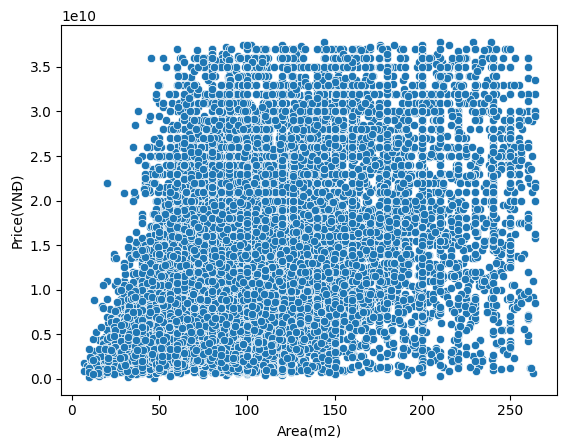

In [55]:
sns.scatterplot(data = real_estate_for_sale_df,x = real_estate_for_sale_df['Area(m2)'], y = real_estate_for_sale_df['Price(VNĐ)']);

Now we have `processed_real_estate_df`, let's start to build a model

### **Build model**

Now, we will prepare the data for the linear regression model. First, we take the `Y` data frame is the `Price`, and `X` is all the attributes `Arre`, `Bedroom`, `Toilet`, `Floor` 
The purpose of linear regression is build a formula like

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

Câu chuyện, design cost funtion và minimize nó

In [57]:
X = processed_real_estate_df.drop(columns=['Price(VNĐ)'])
Y = processed_real_estate_df['Price(VNĐ)']
X

,Area(m2),Bedroom(Phòng),Toilet(Phòng),Floor(Tầng),Type_Căn hộ chung cư,"Type_Nhà biệt thự, liền kề",Type_Nhà mặt phố,Type_Nhà riêng,Type_Đất bán,Type_Đất nền dự án
0,161.08,3.0,3.0,3.0,True,False,False,False,False,False
1,116.00,3.0,2.0,3.0,True,False,False,False,False,False
2,77.00,2.0,2.0,3.0,True,False,False,False,False,False
3,76.00,2.0,2.0,3.0,True,False,False,False,False,False
4,95.00,2.0,2.0,3.0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
43829,78.20,-1.0,-1.0,-1.0,False,False,False,False,False,True
43830,140.00,4.0,4.0,3.0,False,True,False,False,False,False
43832,140.00,5.0,6.0,6.0,False,False,True,False,False,False
43833,66.00,4.0,6.0,3.0,False,False,True,False,False,False


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)